<a href="https://colab.research.google.com/github/kdenny25/Project_Credit_Fraud/blob/master/Anomaly_detection_credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Details

This project was assigned during a Machine Learning Class at Colorado Technical University. Data for this project was provided by the school.

Credit card fraud detection seems to be a standard project for many aspiring Data Scientists. It provides of the obvious affects of protecting the customer from fraud. But, how does this tool impact the bank? There are several reasons banks want to deploy a fraud detection model and specific requirements to consider in order to prevent loss and improve profits.

## Banks and Credit Card Fraud

When it comes to credit card fraud the bank is the first to lose out. Money is taken from the bank in addition to spending money investigating the matter and issuing new credit cards. In 2022 card fraud amounted to $32.34 billion in losses to banks and businesses ([Bankrate](https://www.bankrate.com/finance/credit-cards/credit-card-fraud-statistics/#types)). Given these losses it is ideal to develop methods to prevent credit card fraud.

One such way of preventing credit card fraud is developing a realtime detection system that locks the card and notifies the customer of potential fraud.

When developing an algorithm for detection a bank may be concerned with the following requirments.
* Fast Detection
* High Accuracy
* Low False Negative results

Processing and authorizing a transaction happens within a few seconds. A detection system needs to be less than a second to avoid any disruption in customers daily activities.

High accuracy and low false negative results means it is more beneficial to the company to detect as many cases of fraud as possible. A customer experiencing a card lock from fraudulent activities may experience slight frustration if the occurance is not frequent. The bank can also offer quick resolution features like a text or automated phone call to inform the customer of fraudulent activites. At that point customers can reactivate their card or verify the fraud.


# Table of Conents:

- [Project Libraries](#project-libraries)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Feature Engineering](#feature-engineering)
 - [Feature Correlation](#feature-correlation)
 - [Continuous Feature Selection](#continuous-feature-selection)
 - [Categorical Feature Selection](#categorical-feature-selection)
- [Hyperparameter Tuning](#hyperparameter-tuning)
 - [Hyperparameter Tuning Results](#hyperparameter-tuning-results)
- [Model Testing](#model-testing)
- [Conclusion](#conclusion)


# <a name="project-libraries"></a>Project Libraries

All libraries for this project are listed in this block.

In [20]:
# linear algebra
import numpy as np

# data processing library
import pandas as pd

# pyplot from matplotlib
import matplotlib.pyplot as plt

# high level visualization package
import seaborn as sns

# import library to generate training and testing datasets
from sklearn.model_selection import train_test_split

# import library to help scale features in the datsets
from sklearn.preprocessing import StandardScaler

# import K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# import support vector machines
from sklearn.svm import SVC

# import chi2 for categorical feature selection
from sklearn.feature_selection import chi2

# import confusion matrix metric
from sklearn.metrics import confusion_matrix

# import pipeline for model creation
from sklearn.pipeline import Pipeline

# import RandomizedSearchCV for hyperparemeter optimization and crossvalidation
from sklearn.model_selection import RandomizedSearchCV

# import stratifiedKFold for cross validation
from sklearn.model_selection import StratifiedKFold

# import Logistic Regression for feature selection
from sklearn.linear_model import LogisticRegression

# import accuracy score metric
from sklearn.metrics import accuracy_score

# import confusion matrix metric and graph display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import time
import time

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <a name="exploratory-data-analysis"></a>Exploratory Data Analysis
How are credit cards used and what can we understand about their use to identify credit card fraud?

Credit cards have various uses, ranging from everyday expenses like gas and groceries to bigger expenditures like electronics or vacations. They can also come in handy for unexpected situations, such as car repairs or unexpected medical bills. Regardless of the purpose, people tend to exhibit certain spending patterns.

Apart from purchase trends, there are also patterns in how and where credit cards are used. For example, someone might consistently use their card in a particular city, or they might exclusively rely on the chip for transactions instead of making online purchases. These patterns can be monitored to detect potential fraud.

If a credit card that is typically used for small transactions suddenly shows large purchases, it could indicate fraudulent activity. Similarly, if the card is being used in a city where the cardholder neither resides nor works, it raises suspicion as well.

Now that we understand some nuances to credit card usage let’s look at the data.
The next step is loading the data from a .csv file into a dataframe and viewing the raw data.


In [22]:
# read csv file to dataframe
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/card_transdata.csv')

# display dataframe
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0



There are 1 million entries and 8 columns.

The columns names are:
* distance_from_home - Distance from home where transaction occured
* distance_from_last_transaction - Distance from where last transaction occured
* ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price
* repeat_retailer - Has historically purchased from retailer (1 = Yes / 0 = No)
* used_chip - Was chip used in transaction (1 = Yes / 0 = No)
* used_pin_number - Was PIN used to complete transaction (1 = Yes / 0 = No)
* online_order - Was transaction an online order (1 = Yes / 0 = No)
* fraud - Was transaction fraudulent (1 = Yes / 0 = No)

Based on how the data has been organized we can assume it doesn't represent a single client. Instead, it is a collection of transactions from many clients and likely from a single credit card company.

Features relating to distance have no unit of measure however, we can assume the unit of measure is the same across distance based features. We care more about relations between distance and other variables.

The data type of all features are float. Whether a boolean value is a float or an integer shouldn't have an impact on the model so we will leave them be.

Let's take a closer look at each feature.

In [23]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The count of each column is exactly 1 million indicating all features are present in each record. In other words we don't have any missing values.

Approximately 88% of transactions were with a repeat retailer. 35% used a chip. 10% used a pin. 65 % were online orders.

8.7% of transactions were fraudulent.

There's a big difference from the 75th quantile and the max values of distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price. We will look at these values to find the likelihood of fraud occurring. If the likelihood is low then we can remove the outliers.

In [24]:
# create list of continuous features
cont_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

for idx, col in enumerate(cont_cols):
    # find the 25th and 75th percentiles
    seventy_fifth = df[col].quantile(0.75)
    twenty_fifth = df[col].quantile(0.25)

    # calculate the interquartile rate
    iqr = seventy_fifth - twenty_fifth

    # calculate the thresholds
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)

    print(col)
    print(df[df[col] > upper].groupby('fraud')[col].apply(lambda x: str(round(100*(x.count()/df[df[col] > upper][col].count()), 2)) +' %' ), '\n')

distance_from_home
fraud
0.0    75.18 %
1.0    24.82 %
Name: distance_from_home, dtype: object 

distance_from_last_transaction
fraud
0.0    87.16 %
1.0    12.84 %
Name: distance_from_last_transaction, dtype: object 

ratio_to_median_purchase_price
fraud
0.0    37.08 %
1.0    62.92 %
Name: ratio_to_median_purchase_price, dtype: object 



The lower threshold is negative meaning there are no outliers in the lower threshold and doesn't need to be included in our evaluation.

For each feature in the upper threshold, the impact of fraud is more than 8% of the data. This means removing the data could negatively impact our results. Therefore we will keep it.

Our next step is looking at the distributions of our continuous columns. Based on previous results it is like the data is skewed right. A log transformation could give us a more normal distribution so that our models can better predict the outcomes. We will explore both distributions.

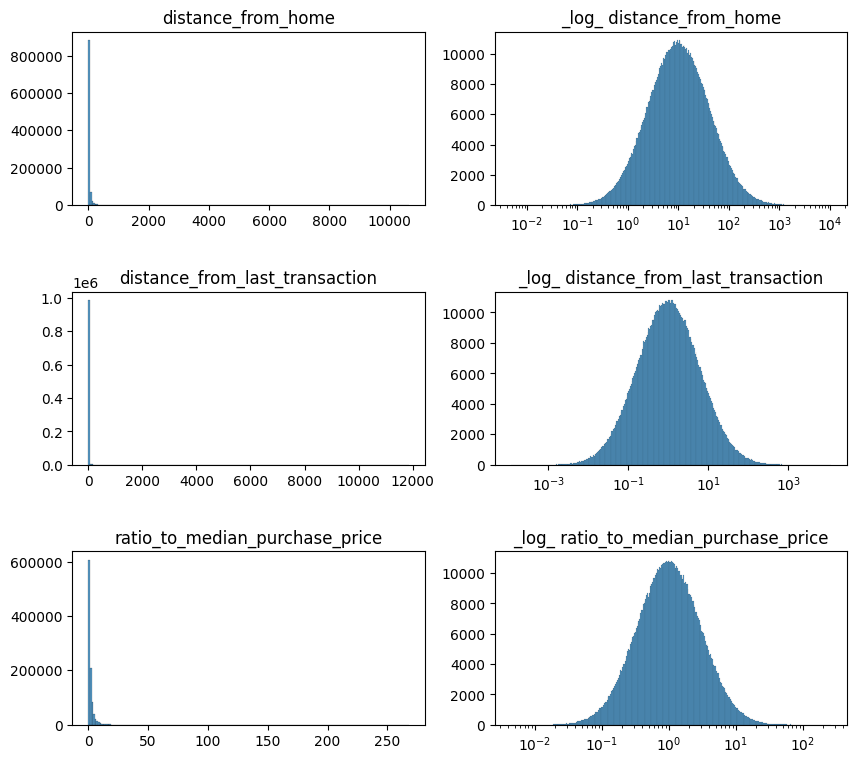

In [25]:
# create list of continuous features
cont_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*3))

fig.subplots_adjust(hspace=0.5)

for idx, col in enumerate(cont_cols):
    sns.histplot(df, x=col, ax=axs[idx][0], bins=200).set(title=col, xlabel=None, ylabel=None)
    sns.histplot(df, x=col, ax=axs[idx][1], log_scale=True).set(title=('_log_ ' + col), xlabel=None, ylabel=None)


plt.show()

# <a name="feature-engineering">Feature Engineering:

Given the results of the log transformation has a normal distribution those features will be added do our data.



In [26]:
# iterate through each continuous data column
for col in cont_cols:
  # transform column append new column to dataframe
  df[('_log_'+col)] = np.log(df[col])

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,_log_distance_from_home,_log_distance_from_last_transaction,_log_ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,4.058335,-1.167512,0.665745
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,2.382315,-1.739595,0.257907
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,1.627490,-0.216723,-0.849299
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.809847,1.722774,-1.014282
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,3.788520,-0.568302,0.798753


I will also be creating a features of the sum of our categorical features. This will help identify fraud by the number of criteria met.

In [27]:
cat_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

df['sum_of_cats'] = df[cat_cols].sum(axis=1)

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,_log_distance_from_home,_log_distance_from_last_transaction,_log_ratio_to_median_purchase_price,sum_of_cats
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,4.058335,-1.167512,0.665745,2.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,2.382315,-1.739595,0.257907,1.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,1.627490,-0.216723,-0.849299,2.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.809847,1.722774,-1.014282,3.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,3.788520,-0.568302,0.798753,3.0


## <a name="feature-correlation">Feature Correlation

Checking the correlation of our features will give us an idea of how the data relates to the target feature ('Fraud').

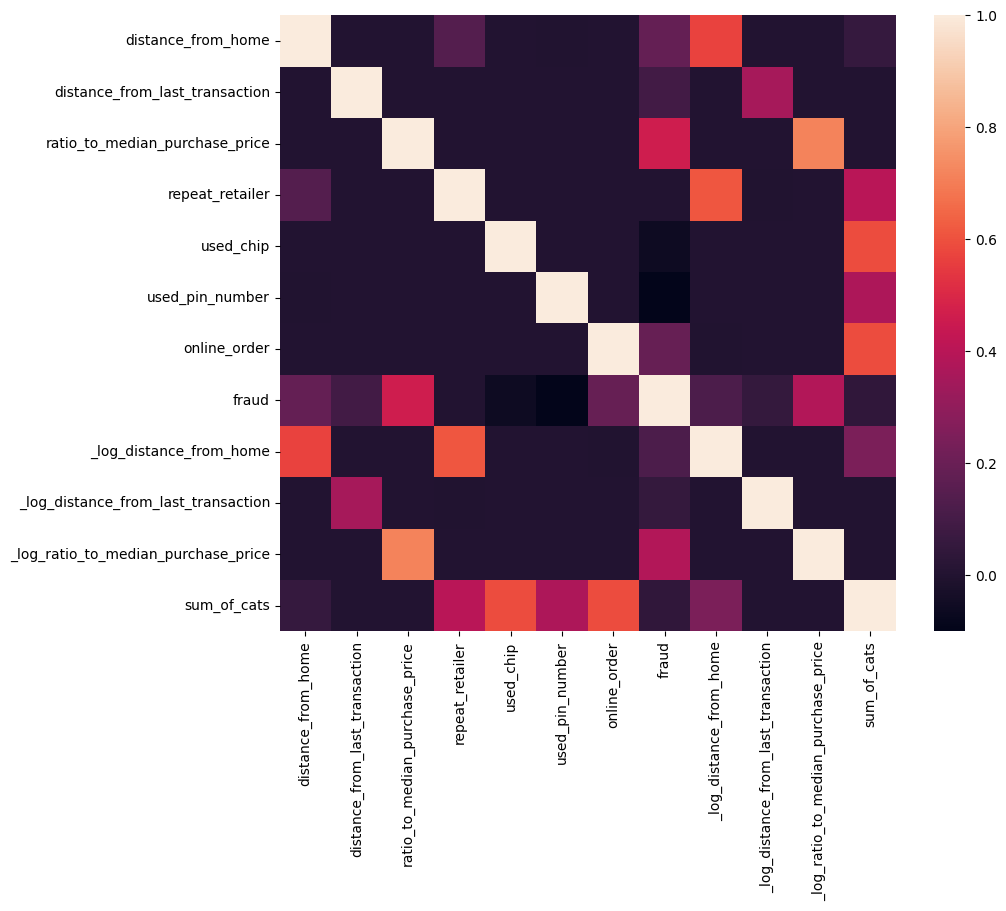

In [28]:
# Generate correlation matrix
corrmat = df.corr()

# setup figure size
fig = plt.figure(figsize = (10, 8))

# assign data to a heatmap
sns.heatmap(corrmat, square = True)
plt.show()

Our newly log transformed features seem to have less correlation with fraud than the original data points. However, correlation is not the best way to identify the relationship between these features and our target feature. To determine which features to keep we will compare the results of a logistic regression model.

Categorical features will not have much if any correlation at all because they're binary features. The exception being sum_of_cats.  

## <a name="continuous-feature-selection">Continuous Feature Selection

The continuous features include the originals and log transformed features. Since these features are somewhat redudent we will score them based on accuracy to determine whether the to keep the original or log transformed feature.

In [29]:
cont_cols = [i for i in df.columns if df[i].nunique() > 5]

scores = {}

print('Average Accuracy Score:')

for col in cont_cols:
  # instantiate cross validation
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

  X = df[[col]]
  y = df['fraud']

  col_scores = []

  for train_index, test_index in skf.split(X,y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ])

    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    score = accuracy_score(y_test, y_pred)

    col_scores.append(score)

  mean_accuracy = np.mean(col_scores)
  print(f'{col}: {round(mean_accuracy, 4)}')

  scores[col] = mean_accuracy


cols_to_drop = []
for col, value in scores.items():
  if '_log_' not in col:
    if scores[col] > scores['_log_'+col]:
      cols_to_drop.append('_log_'+col)
    else:
      cols_to_drop.append(col)

df = df.drop(cols_to_drop, axis=1)

print("Features dropped: ", cols_to_drop)

Average Accuracy Score:
distance_from_home: 0.9119
distance_from_last_transaction: 0.9126
ratio_to_median_purchase_price: 0.9209
_log_distance_from_home: 0.9126
_log_distance_from_last_transaction: 0.9126
_log_ratio_to_median_purchase_price: 0.92
Features dropped:  ['distance_from_home', 'distance_from_last_transaction', '_log_ratio_to_median_purchase_price']


## <a name="categorical-feature-selection">Categorical Feature Selection

I believe all categorical features in this dataset are relevant to the target feature. It is however, good to know how each one ranks.

In [31]:
cat_cols = [i for i in df.columns if df[i].nunique() <= 5 and  i != 'fraud']

X_cat = df[cat_cols]
y_cat = df['fraud']

chi2_results = chi2(X_cat, y_cat)

for idx, col in enumerate(cat_cols):
  print(f'{col} chi2 score: {chi2_results[0][idx]}')
  print(f'p-value: {chi2_results[1][idx]}')

cols_to_remove = [val for idx, val in enumerate(cat_cols) if chi2_results[1][idx] > 0.05]

print(cols_to_remove)
df = df.drop(cols_to_remove, axis=1)

repeat_retailer chi2 score: 0.2182901523648334
p-value: 0.6403458361392063
used_chip chi2 score: 2415.1525670213464
p-value: 0.0
used_pin_number chi2 score: 9046.618108185068
p-value: 0.0
online_order chi2 score: 12878.364170274288
p-value: 0.0
sum_of_cats chi2 score: 511.0029469738726
p-value: 3.837094874113697e-113
['repeat_retailer']


repeat_retailer and sum_of_cats are the least important features however, sum_of_cats has an acceptable p-value. The other three features are completely relevent.

After testing, accuracy increased slightly while execution time decreased. Because of this code was added to remove categorical columns with a p-value greater than 0.05.

# <a name="hyperparameter-tuning">Hyperparameter Tuning

In [ ]:
# # split data into independent 'X' and dependent 'Y' variables
# X = df.drop(['fraud'], axis=1).values
# y = df['fraud'].values

# models = { 'knn': KNeighborsClassifier(),
#           'tree': DecisionTreeClassifier(),
#            'svm': SVC()}

# params = {'knn':{
#               'model__n_neighbors': [2,3,4,5,6,7,8,9,10],
#               'model__metric': ['minkowski'],
#               'model__p': [1, 2]},
#           'tree':{
#               'model__random_state': [24],
#               'model__max_depth': [1,2,3,4,5,6,7,8,9,10],
#           },
#           'svm':{
#               'model__C': [0.1, 1, 10, 100, 1000],
#               'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'model__kernel': ['rbf']
#           }
#           }

# for key, model in models.items():

#   skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

#   # create pipeline for model
#   pipeline = Pipeline([
#       ('scaler', StandardScaler()),
#       ('model', model)
#   ])

#   search = RandomizedSearchCV(pipeline,
#                         param_distributions=params[key],
#                         scoring='accuracy',
#                         cv= skf,
#                         verbose=3,
#                         n_iter=25,
#                         random_state=24)

#   result = search.fit(X, y)

#   print(f'{key} results:')
#   print(f'Best Score: {result.best_score_}')
#   print(f'Best Hyperparameters: {result.best_params_}')

# print("completed")

### <a name="hyperparameter-tuning-results">Hyperparamter Tuning Results

KNN:
* Best Score: 0.9976929999999999
* Best Hyperparameters: {'model__p': 1, 'model__n_neighbors': 9, 'model__metric': 'minkowski'}

Decision Tree:
* Best Score: 0.999985
* Best Hyperparameters: {'model__random_state': 24, 'model__max_depth': 6}

SVM:
* Each test took 1 hour to complete and timedout after 5 folds. For these reasons SVM will not be used.

## <a name="model-testing">Model Testing

We will be using K Nearest Neighbors (KNN) to detect whether fraud occured or not. Before creating the model we will split the data. 80% training and 20% testing. This ratio is fairly standard to test a model.

KNN doesn't do well when feature values have different ranges. This could lead to unwanted bias in our model. To ensure we get the best results the data will be scaled using SKlearns Standard Scaler.

In [32]:
# # split data into independent 'X' and dependent 'Y' variables
X = df.drop(['fraud'], axis=1).values
y = df['fraud'].values

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

Accuracy score of KNN: 0.9976242424242424
Time to execute 33% of data: 66.15246224403381


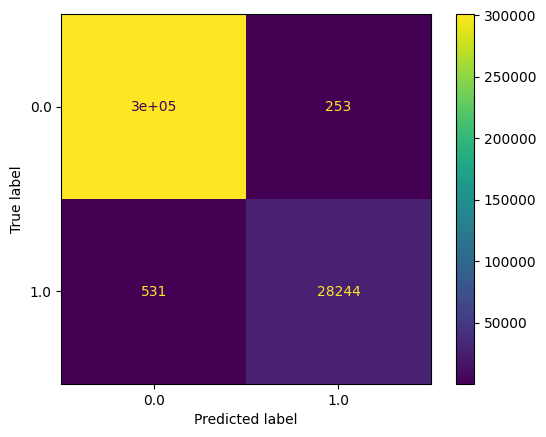

In [33]:
# KNN prediction model
knn = KNeighborsClassifier(n_neighbors=9, p=1, metric='minkowski' )

# train the model
knn.fit(X_train, y_train)

# check time to execute 33% of the data
start = time.time()

# predict fraudulant transactions
knn_pred = knn.predict(X_test)

# end time of execution
end = time.time()


print(f'Accuracy score of KNN: {accuracy_score(y_test, knn_pred)}')
print(f'Time to execute 33% of data: {end-start}')

cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)

disp.plot()
plt.show()

Accuracy score of Decision Tree: 0.9999666666666667
Time to execute 33% of data: 0.01510310173034668


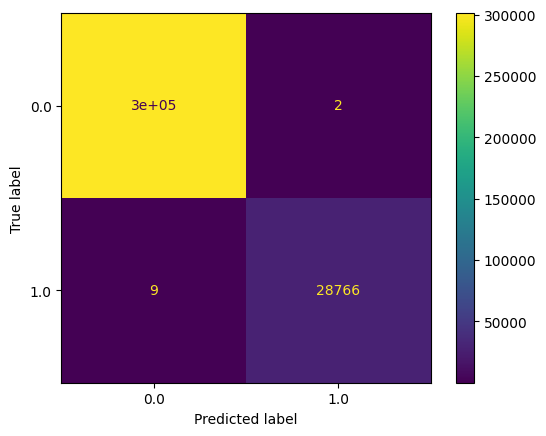

In [34]:
# Decision Tree Prediction model
tree = DecisionTreeClassifier(random_state=24, max_depth=6)

# train the model
tree.fit(X_train, y_train)

# check time to execute 33% of the data
start = time.time()

# predict fraudulant transactions
tree_pred = tree.predict(X_test)

# end time of execution
end = time.time()

print(f'Accuracy score of Decision Tree: {accuracy_score(y_test, tree_pred)}')
print(f'Time to execute 33% of data: {end-start}')

cm = confusion_matrix(y_test, tree_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)

disp.plot()
plt.show()

# <a name="conclusion">Conclusion

Decision tree is the best method of detecting fraud in near real-time. The accuracy is very high and execution time is low enough to avoid any lag time while the consumer is using their card. False Positive errors are also an acceptable range.

When implemented, the model in an ideal situation reduces fraudulent transactions by 99%. However, scammers adapt quickly to the change and can change their habits. This model would have to be tested frequently to keep up with the habits.

The best method is deploying an automated process that tests the data daily, recording values from feature selection and hyperparameter tuning. Any significant change in these data points should be proceeded with by a notification to the Data Science team for evaluation. Additionally, the model should be manually tested and evaluated on a weekly or monthly basis to verify the model is working as it should.

Fraud is an ever-changing landscape. Using machine learning methods it is possible to make fraud harder preventing consumer frustrations while saving banks and retailers from suffering financial loss.